# Task 1: Linear Regression Modeling

Alex Rivera ID#011243153

Western Governors University

D208 - Predictive Modeling

August 23, 2023

## A1: Research Question

The research question I want to explore is, "Which factors significantly impact customer monthly charges?"

## A2: Goals

The objective of the analysis is to gain a better understanding of the factors impacting customer monthly charges. Currently, the dataset provides minimal insight into factors making up the monthly charges. The insight will not only consider customer add-ons but customer characteristics throughout the whole dataset for correlation and understanding. This added dimension of insight into monthly charges can assist in the further understanding of future analysis of customer churn. 

## B1: Summary Of Assumptions

According to the Leard Statistics article, below are four assumptions of multiple linear regression (Multiple regression analysis using SPSS statistics, 2023):

•	Dependent variables should be measured on a continuous scale. 

•	There needs to be a linear relationship between the dependent variable and each of your independent variables. 

•	The data must not show multicollinearity. 

•	There should be no significant outliers, high leverage points, or highly influential points.

## B2: Tool Benefits

The programming language used for cleaning and creating the linear regression models was Python. Python is an open-source programming language that has allowed me to gain experience using it in a diverse amount of projects besides just data analysis. The WGU website states the following advantages of using python, "Python’s focus on readability and simplicity makes its learning curve relatively linear and smooth. Python is great for mathematical computation and learning how algorithms work." (R or Python, 2022). A collection of libraries were used to accomplish the goals of the project. The Pandas library was the main driver for data manipulation and analysis. The NumPy library was used for scientific computation and manipulating array data for the linear regression models. Data visualization was done with Matplotlib and Seaborn libraries. Normalization and preprocessing data for the model were done with Scikit-learn. The linear regression models were implemented with the Statsmodels library.  

## B3: Appropriate Technique

To analyze the research question, "Which factors significantly impact customer monthly charges?" it will need to be broken up into two pieces making up the question. First, the dependent variable is the customer's monthly charge which is a continuous variable. The first assumption listed in section B1, dependent variables should be measured on a continuous scale. The continuous dependent variable of the research question makes an appropriate technique over logistic regression which would be an ordinal or binary variable. Second, which factors significantly impact would be the independent variables that will be analyzed according to the second to fourth assumptions in section B1. Outliers will be checked for in the data cleaning portion of the project. Linear relationships and multicollinearity will be tested during the model reduction phase of the project. All the linear regression assumptions will be covered throughout this project making it the appropriate technique for the analysis of the research question. 

## C1: Data Cleaning Goals

The data cleaning goals are to prepare the data for summary statistics by detecting duplicates, treating nulls, reviewing outliers, replacing any values as needed, changing formats, and creating a dataframe with only relevant variables for analysis. Churn_clean CSV provided had a portion of these steps already implemented but to make sure all the correct steps are taken D206 Data Cleaning project was used as a baseline of code to work off of (Rivera, 2023). Churn.duplicated().value_counts() was used to check for duplicates in the dataset, these two functions would count if any row is duplicated in the dataset. The detection of nulls was done by running Churn.isnull().sum(), this summed the total of nulls in the dataset. Since the detection of nulls returned zero null values no further treatment was needed. Reviewing of outliers was done by implementing the describe() function on the relevant variables found in section C2, no further treatment of outliers was needed. The code from D206 assisted in changing the variable formats, replacing the timezone to correct data, and renaming the columns as necessary. Finally, the relevant variables for the project were selected into a new dataframe regress_churn. 

In [1]:
#Importing necessary packages for the Linear Regression project 
import pandas as pd 
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Loading the churn dataset flat file into a pandas dataframe 
churn = pd.read_csv('C:/Users/alexa/WGU/D208/Project/churn_clean.csv', index_col=0)

#Running info() for an overview of the dataframe 
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [2]:
#Setting options to view max columns for review during data cleaning
pd.set_option("display.max_columns", None)

#Viewing dataframe
churn

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


In [3]:
#Detecting duplicates in the churn dataframe
print(churn.duplicated().value_counts())

#Dectecting if Customer_id is unique to confirm no duplicates
churn['Customer_id'].is_unique

False    10000
dtype: int64


True

In [4]:
#Dectecting null values in the dataframe 
churn.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

In [5]:
#Running a block of code to change column types to categorical or boolean and replace text to match the dataset dictionary
churn["Area"] = churn["Area"].astype("category")
churn.TimeZone.replace({
    "America/Anchorage" : "Alaska Time Zone",
    "America/Juneau" : "Alaska Time Zone",
    "America/Nome" : "Alaska Time Zone",
    "America/Sitka" : "Alaska Time Zone",
    "America/Puerto_Rico" : "Atlantic Time Zone",
    "America/Chicago" : "Central Time Zone",
    "America/Indiana/Knox" : "Central Time Zone",
    "America/Indiana/Tell_City" : "Central Time Zone",
    "America/Menominee" : "Central Time Zone",
    "America/North_Dakota/New_Salem" : "Central Time Zone",
    "America/Detroit" : "Eastern Time Zone",
    "America/Indiana/Indianapolis" : "Eastern Time Zone",
    "America/Indiana/Marengo" : "Eastern Time Zone",
    "America/Indiana/Petersburg" : "Eastern Time Zone",
    "America/Indiana/Vincennes" : "Eastern Time Zone",
    "America/Indiana/Winamac" : "Eastern Time Zone",
    "America/Kentucky/Louisville" : "Eastern Time Zone",
    "America/New_York" : "Eastern Time Zone",
    "America/Toronto" : "Eastern Time Zone",
    "Pacific/Honolulu" : "Hawaii-Aleutian Time Zone",
    "America/Boise" : "Mountain Time Zone",
    "America/Denver" : "Mountain Time Zone",
    "America/Ojinaga" : "Mountain Time Zone",
    "America/Phoenix" : "Mountain Time Zone",
    "America/Los_Angeles" : "Pacific Time Zone"
    }, inplace=True)
churn["TimeZone"] = churn["TimeZone"].astype("category")
churn["Marital"] = churn["Marital"].astype("category")
churn.Gender.replace("Prefer not to answer","Nonbinary", inplace=True)
churn["Gender"] = churn["Gender"].astype("category")
churn["InternetService"] = churn["InternetService"].astype("category")
churn["PaymentMethod"] = churn["PaymentMethod"].astype("category")
churn["Item1"] = churn["Item1"].astype("category")
churn["Item2"] = churn["Item2"].astype("category")
churn["Item3"] = churn["Item3"].astype("category")
churn["Item4"] = churn["Item4"].astype("category")
churn["Item5"] = churn["Item5"].astype("category")
churn["Item6"] = churn["Item6"].astype("category")
churn["Item7"] = churn["Item7"].astype("category")
churn["Item8"] = churn["Item8"].astype("category")
#Renaming survey coulmns appropriately
churn.rename(columns={
    'Item1' : 'timely_response',
    'Item2' : 'timely_fixes',
    'Item3' : 'timely_replacements',
    'Item4' : 'reliability',
    'Item5' : 'options',
    'Item6' : 'respectful_response',
    'Item7' : 'courteous_exchange',
    'Item8' : 'evidence_of_active_listening'
}, inplace=True)
#Creating dataframe with variables needed for analysis 
regress_churn = churn[["MonthlyCharge","Children","Age","Income","Port_modem","InternetService","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]
#Viewing dataframe
regress_churn

,MonthlyCharge,Children,Age,Income,Port_modem,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
CaseOrder,,,,,,,,,,,,,
1,172.455519,0,68,28561.99,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes
2,242.632554,1,27,21704.77,No,Fiber Optic,Yes,Yes,No,No,No,Yes,Yes
3,159.947583,4,50,9609.57,Yes,DSL,Yes,No,No,No,No,No,Yes
4,119.956840,1,48,18925.23,No,DSL,Yes,Yes,No,No,No,Yes,No
5,149.948316,0,83,40074.19,Yes,Fiber Optic,No,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,159.979400,3,23,55723.74,Yes,DSL,Yes,No,Yes,Yes,No,No,No
9997,207.481100,4,48,34129.34,No,Fiber Optic,Yes,Yes,Yes,Yes,No,Yes,No
9998,169.974100,1,48,45983.43,No,Fiber Optic,Yes,Yes,Yes,No,No,No,No


## C2: Summary Statistics

MonthlyCharge is a continuous variable with a count of 10,000. The minimum value is 79.978860 and the max value is 290.160419. The mean or average of the variable is 172.624816. The standard deviation or the measure of how dispersed the variable is in relation to the mean is 42.943094.  

In [6]:
regress_churn.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

Children is a continuous variable with a count of 10,000. The minimum value is 0.0000 and the max value is 10.0000. The mean or average of the variable is 2.0877. The standard deviation or the measure of how dispersed the variable is in relation to the mean is 2.1472.

In [7]:
regress_churn.Children.describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

Age is a continuous variable with a count of 10,000. The minimum value is 18.0000 and the max value is 89.0000. The mean or average of the variable is 53.078400. The standard deviation or the measure of how dispersed the variable is in relation to the mean is 20.698882.

In [8]:
regress_churn.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

Income is a continuous variable with a count of 10,000. The minimum value is 348.670000 and the max value is 258900.700000. The mean or average of the variable is 39806.926771. The standard deviation or the measure of how dispersed the variable is in relation to the mean is 28199.916702.

In [9]:
regress_churn.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

Port_modem is a categorical variable with 2 unique values of "Yes" and "No". The mode or the value that appears the most frequently is "No" at 5166 or 51.66% of the time. 

In [10]:
regress_churn.Port_modem.describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

InternetService is a categorical variable with 3 unique values of "Fiber Optic", "DSL" and "None". The mode or the value that appears the most frequently is "Fiber Optic" at 4408 or 44.08% of the time. 

In [11]:
regress_churn.InternetService.describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

Phone is a categorical variable with 2 unique values of "Yes" and "No". The mode or the value that appears the most frequently is "Yes" at 9067 or 90.67% of the time. 

In [12]:
regress_churn.Phone.describe()

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

OnlineSecurity is a categorical variable with 2 unique values of "Yes" and "No". The mode or the value that appears the most frequently is "No" at 6424 or 64.24% of the time. 

In [13]:
regress_churn.OnlineSecurity.describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

OnlineBackup is a categorical variable with 2 unique values of "Yes" and "No". The mode or the value that appears the most frequently is "No" at 5494 or 54.94% of the time. 

In [14]:
regress_churn.OnlineBackup.describe()

count     10000
unique        2
top          No
freq       5494
Name: OnlineBackup, dtype: object

DeviceProtection is a categorical variable with 2 unique values of "Yes" and "No". The mode or the value that appears the most frequently is "No" at 5614 or 56.14% of the time. 

In [15]:
regress_churn.DeviceProtection.describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

StreamingTV is a categorical variable with 2 unique values of "Yes" and "No". The mode or the value that appears the most frequently is "No" at 5071 or 50.71% of the time.

In [16]:
regress_churn.StreamingTV.describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

StreamingMovies is a categorical variable with 2 unique values of "Yes" and "No". The mode or the value that appears the most frequently is "No" at 5614 or 56.14% of the time.

In [17]:
regress_churn.StreamingMovies.describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

## C3: Visualizations

**Univariate visualizations** 
 - MonthlyCharge(continuous)
     - dependent variable
 - Children(continuous)
 - Age (continuous)
 - Income (continuous)
 - Port_modem (categorical)
 - InternetService (categorical)
 - Phone (categorical)
 - OnlineSecurity (categorical)
 - OnlineBackup (categorical)
 - DeviceProtection (categorical)
 - TechSupport (categorical)
 - StreamingTV (categorical)
 - StreamingMovies (categorical)

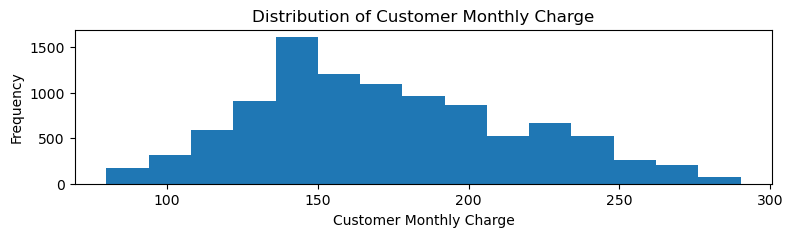

In [18]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Customer Monthly Charge')
plt.hist(data=regress_churn, x="MonthlyCharge", bins = 15)
plt.xlabel('Customer Monthly Charge')
plt.ylabel("Frequency");

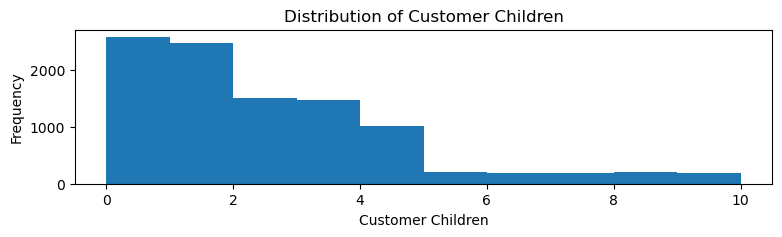

In [19]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Customer Children')
plt.hist(data=regress_churn, x="Children", bins = 10)
plt.xlabel('Customer Children')

plt.ylabel("Frequency");

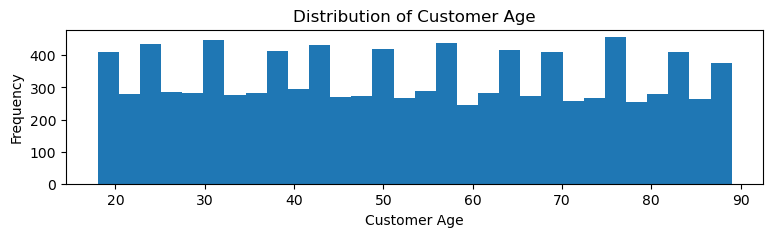

In [20]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Customer Age')
plt.hist(data=regress_churn, x="Age", bins = 30)
plt.xlabel('Customer Age')
plt.ylabel("Frequency");

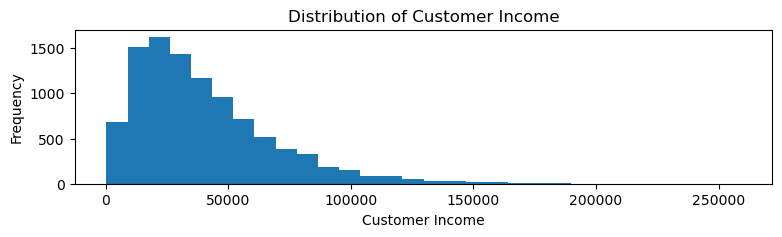

In [21]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Customer Income')
plt.hist(data=regress_churn, x="Income", bins = 30)
plt.xlabel('Customer Income')
plt.ylabel("Frequency");

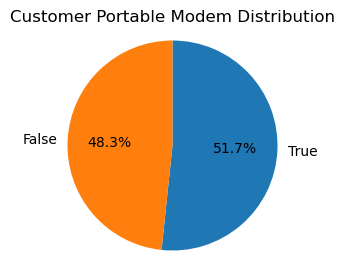

In [22]:
plt.figure(figsize = [9,3])
plt.title("Customer Portable Modem Distribution")
counts = regress_churn["Port_modem"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

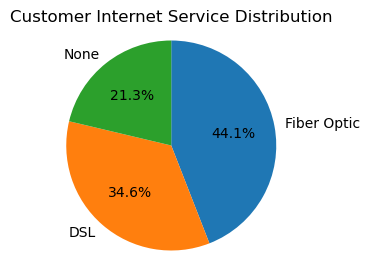

In [23]:
plt.figure(figsize = [9,3])
plt.title("Customer Internet Service Distribution")
counts = regress_churn["InternetService"].value_counts()
labels = ["Fiber Optic", "DSL", "None"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

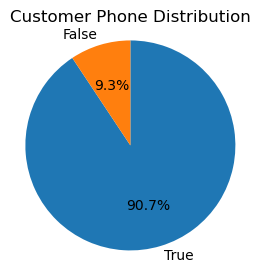

In [24]:
plt.figure(figsize = [9,3])
plt.title("Customer Phone Distribution")
counts = regress_churn["Phone"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

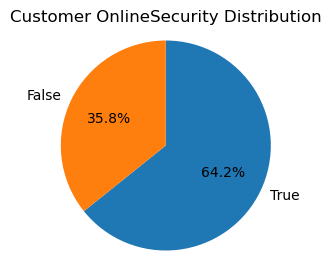

In [25]:
plt.figure(figsize = [9,3])
plt.title("Customer OnlineSecurity Distribution")
counts = regress_churn["OnlineSecurity"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

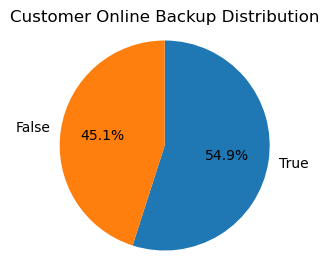

In [26]:
plt.figure(figsize = [9,3])
plt.title("Customer Online Backup Distribution")
counts = regress_churn["OnlineBackup"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

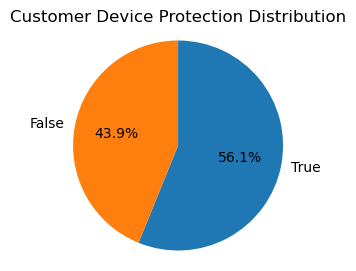

In [27]:
plt.figure(figsize = [9,3])
plt.title("Customer Device Protection Distribution")
counts = regress_churn["DeviceProtection"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

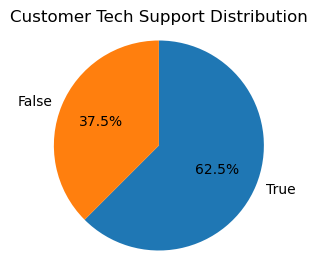

In [28]:
plt.figure(figsize = [9,3])
plt.title("Customer Tech Support Distribution")
counts = regress_churn["TechSupport"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

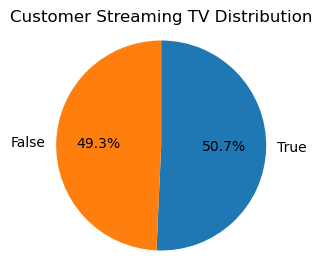

In [29]:
plt.figure(figsize = [9,3])
plt.title("Customer Streaming TV Distribution")
counts = regress_churn["StreamingTV"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

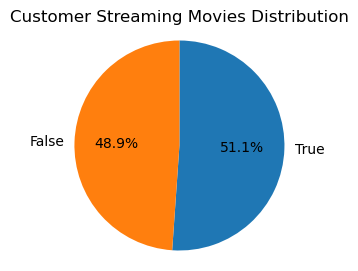

In [30]:
plt.figure(figsize = [9,3])
plt.title("Customer Streaming Movies Distribution")
counts = regress_churn["StreamingMovies"].value_counts()
labels = ["True", "False"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

**Bivariate visualizations**
 - Children (continuous) & MonthlyCharge (continuous)
 - Age (continuous) & MonthlyCharge (continuous)
 - Port_modem (categorical) & MonthlyCharge (continuous)
 - Income (continuous) & MonthlyCharge (continuous)
 - InternetService (categorical) & MonthlyCharge (continuous)
 - Phone (categorical) & MonthlyCharge (continuous)
 - OnlineSecurity (categorical) & MonthlyCharge (continuous)
 - OnlineBackup (categorical) & MonthlyCharge (continuous)
 - DeviceProtection (categorical) & MonthlyCharge (continuous)
 - TechSupport (categorical) & MonthlyCharge (continuous)
 - StreamingTV (categorical) & MonthlyCharge (continuous)
 - StreamingMovies (categorical) & MonthlyCharge (continuous) 

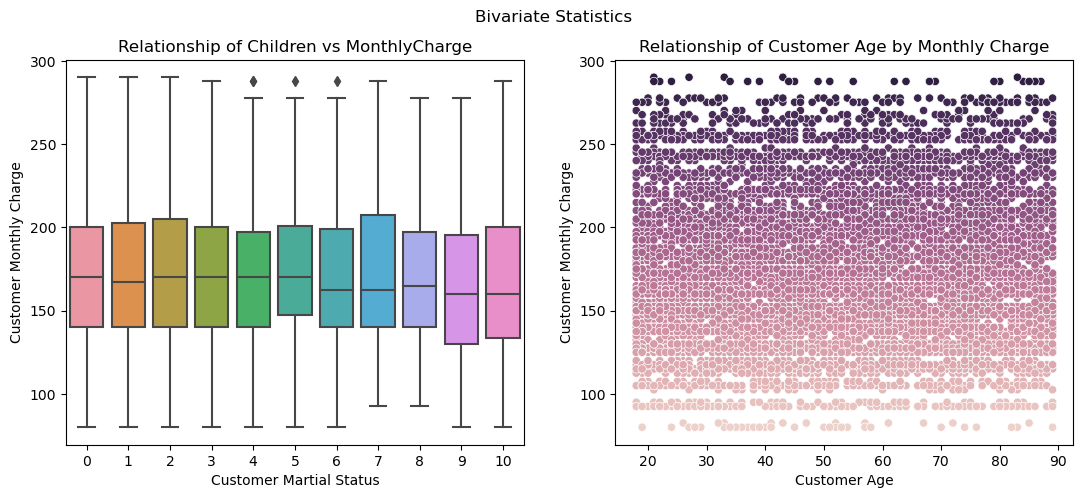

In [31]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of Children (continuous) & MonthlyCharge (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Children vs MonthlyCharge')
sns.boxplot(data= regress_churn, x= "Children", y= "MonthlyCharge")
plt.xlabel('Customer Martial Status')
plt.ylabel("Customer Monthly Charge");

# Right - Bivariate statistics of Age (continuous) & MonthlyCharge (continuous)
#Library documentation referenced for scatterplot (Waskom, Seaborn.scatterplot#)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Age by Monthly Charge")
sns.scatterplot(data=regress_churn, x= "Age", y = "MonthlyCharge", hue ="MonthlyCharge",legend = False )
plt.xlabel("Customer Age")
plt.ylabel("Customer Monthly Charge");

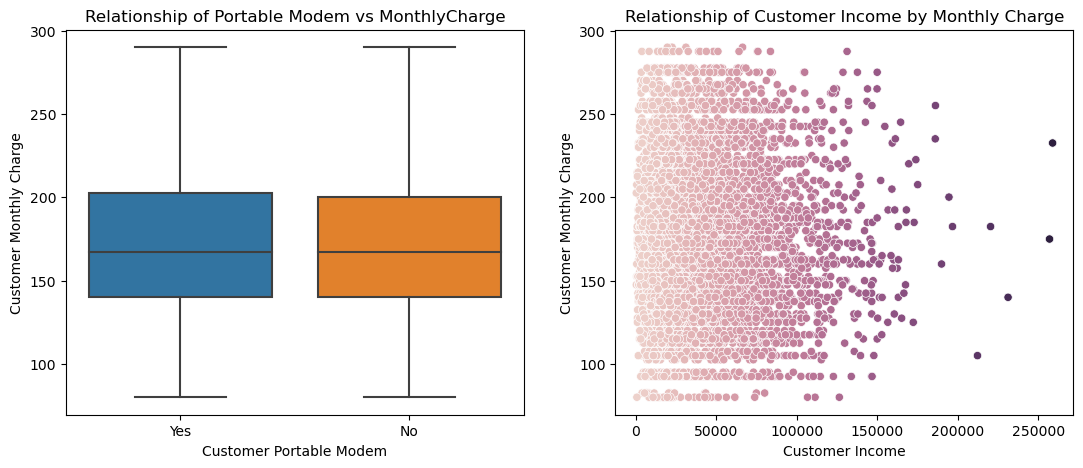

In [32]:
#Adjustment for size and title
plt.figure(figsize = [13,5])

# Left - Bivariate statistics of Port_modem (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Portable Modem vs MonthlyCharge')
sns.boxplot(data= regress_churn, x= "Port_modem", y= "MonthlyCharge")
plt.xlabel('Customer Portable Modem')
plt.ylabel("Customer Monthly Charge");

# Right - Bivariate statistics of Income (continuous) & MonthlyCharge (continuous)
#Library documentation referenced for scatterplot (Waskom, Seaborn.scatterplot#)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Income by Monthly Charge")
sns.scatterplot(data=regress_churn, x= "Income", y = "MonthlyCharge", hue ="Income",legend = False )
plt.xlabel("Customer Income")
plt.ylabel("Customer Monthly Charge");

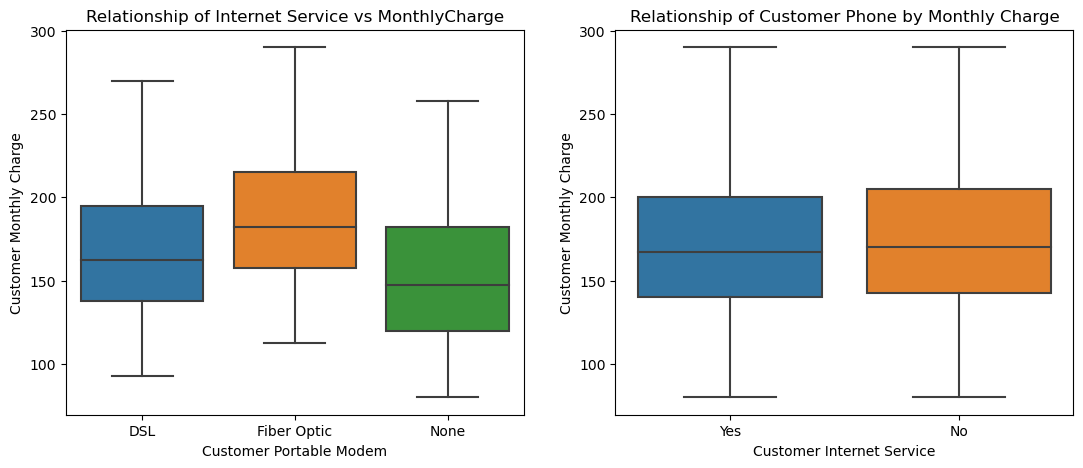

In [33]:
#Adjustment for size and title
plt.figure(figsize = [13,5])

# Left - Bivariate statistics of InternetService (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Internet Service vs MonthlyCharge')
sns.boxplot(data= regress_churn, x= "InternetService", y= "MonthlyCharge")
plt.xlabel('Customer Portable Modem')
plt.ylabel("Customer Monthly Charge");

# Right - Bivariate statistics of Phone (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Phone by Monthly Charge")
sns.boxplot(data= regress_churn, x= "Phone", y= "MonthlyCharge")
plt.xlabel("Customer Internet Service")
plt.ylabel("Customer Monthly Charge");

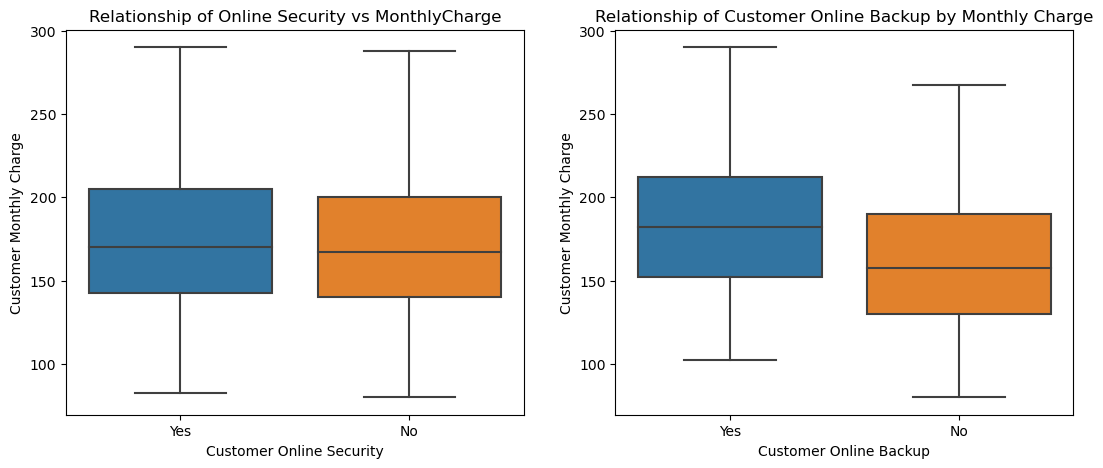

In [34]:
#Adjustment for size and title
plt.figure(figsize = [13,5])

# Left - Bivariate statistics of OnlineSecurity (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Online Security vs MonthlyCharge')
sns.boxplot(data= regress_churn, x= "OnlineSecurity", y= "MonthlyCharge")
plt.xlabel('Customer Online Security')
plt.ylabel("Customer Monthly Charge");

# Right - Bivariate statistics of OnlineBackup (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Online Backup by Monthly Charge")
sns.boxplot(data= regress_churn, x= "OnlineBackup", y= "MonthlyCharge")
plt.xlabel("Customer Online Backup")
plt.ylabel("Customer Monthly Charge");

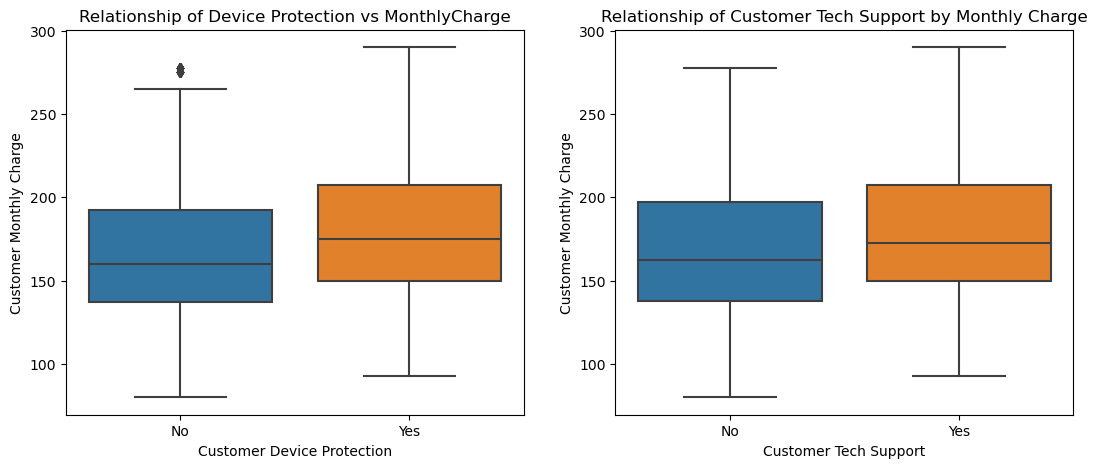

In [35]:
#Adjustment for size and title
plt.figure(figsize = [13,5])

# Left - Bivariate statistics of DeviceProtection (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Device Protection vs MonthlyCharge')
sns.boxplot(data= regress_churn, x= "DeviceProtection", y= "MonthlyCharge")
plt.xlabel('Customer Device Protection')
plt.ylabel("Customer Monthly Charge");

# Right - Bivariate statistics of TechSupport (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Tech Support by Monthly Charge")
sns.boxplot(data= regress_churn, x= "TechSupport", y= "MonthlyCharge")
plt.xlabel("Customer Tech Support")
plt.ylabel("Customer Monthly Charge");

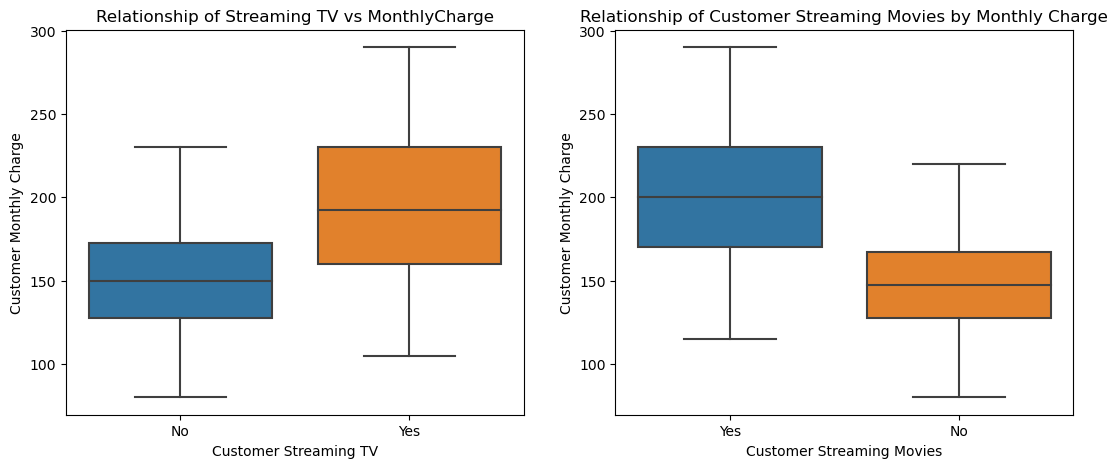

In [36]:
#Adjustment for size and title
plt.figure(figsize = [13,5])

# Left - Bivariate statistics of StreamingTV (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Streaming TV vs MonthlyCharge')
sns.boxplot(data= regress_churn, x= "StreamingTV", y= "MonthlyCharge")
plt.xlabel('Customer Streaming TV')
plt.ylabel("Customer Monthly Charge");

# Right - Bivariate statistics of StreamingMovies (categorical) & MonthlyCharge (continuous)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Streaming Movies by Monthly Charge")
sns.boxplot(data= regress_churn, x= "StreamingMovies", y= "MonthlyCharge")
plt.xlabel("Customer Streaming Movies")
plt.ylabel("Customer Monthly Charge");

## C4: Data Transformation

Dr. Middleton provided a great outline of the data-wrangling activities needed to implement the data set. It stated, "Most statistical methods/machine learning algorithms mining work exclusively with numeric data. This means that if your data contains categorical data, you must encode it to numbers to perform statistical modeling"(Middleton, 2023). The first data-wrangling activity was to apply one-hot encoding per Dr. Sewell's episode 1 lecture on applying the code (Sewell, 2023). All categorial Yes were replaced with 1 and No were placed to 0. InternetService had 3 unique categorical values, dummie values were created to encode the categories while dropping the first level. Finally that all the values were encoded as numeric the values were normalized throughout the dataset from 0-1, this was accomplished with scikit-learn library preprocessing.  

In [37]:
#Finding and replacing yes/no values to 1/0, article refernced for code (Moffitt, 2017)
regress_churn = regress_churn.replace('Yes', 1)
regress_churn = regress_churn.replace('No', 0)

#Creating dummies for Internet Service, article referenced for code (Ebner, 2022) 
InternetService = pd.get_dummies(data=regress_churn["InternetService"], drop_first=True)
InternetService.rename(columns={"Fiber Optic": "Internet_Fiber_Optic", "None":"Internet_None"}, inplace = True)

#Inserting Internet Service dummies into regress_churn dataframe
regress_churn.insert(5, "Internet_None", InternetService.Internet_None)
regress_churn.insert(5, "Internet_Fiber_Optic", InternetService.Internet_Fiber_Optic)
regress_churn.drop(columns=['InternetService'],inplace=True)

#Normalizing values to 0-1
#MinMaxScaler article referenced for code (Sabu, 2022)
scaler = MinMaxScaler()
regress_churn[['MonthlyCharge','Children','Age','Income']] = scaler.fit_transform(regress_churn[['MonthlyCharge','Children','Age','Income']])

regress_churn

,MonthlyCharge,Children,Age,Income,Port_modem,Internet_Fiber_Optic,Internet_None,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
CaseOrder,,,,,,,,,,,,,,
1,0.439985,0.0,0.704225,0.109120,1,1,0,1,1,1,0,0,0,1
2,0.773872,0.1,0.126761,0.082599,0,1,0,1,1,0,0,0,1,1
3,0.380474,0.4,0.450704,0.035818,1,0,0,1,0,0,0,0,0,1
4,0.190207,0.1,0.422535,0.071848,0,0,0,1,1,0,0,0,1,0
5,0.332900,0.0,0.915493,0.153646,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.380626,0.3,0.070423,0.214174,1,0,0,1,0,1,1,0,0,0
9997,0.606629,0.4,0.422535,0.130653,0,1,0,1,1,1,1,0,1,0
9998,0.428179,0.1,0.422535,0.176501,0,1,0,1,1,1,0,0,0,0


## C5: Prepared Data Set

CSV of the prepared regression dataset was provided with the submission of the report. 

In [38]:
#Save prepared regression dataset to CSV 
regress_churn.to_csv('C:/Users/alexa/WGU/D208/Project/Regress_Prepared_Data.csv', index=False)

## D1: Initial Model

The variables and data outputs of section C5 aided in the initial construction of the multiple linear regression model. The dependent variable is MonthlyCharge. The independent variables are Children, Age, Income, Port_modem, Internet_Fiber_Optic, Internet_None, Phone, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. Dr. Sewell's episode 4 webinar gave a detailed breakdown of implementing the MLR model seen in the coding below (Sewell, 2023). 

In [39]:
#Predictive modeling webinar Episode 4 was referenced for Multiple Linear Regression code (Sewell, 2023)
#Initial model for Multiple Linear Regression

#Y dependent variable
y = regress_churn.MonthlyCharge
#X multiple independent variables
X = regress_churn[["Children","Age","Income","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     3386.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:03:03   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.023e+04
Df Residuals:                    9986   BIC:                        -2.013e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0074 

In [40]:
#Initial model’s residual standard error
#Residual Standard Error coding example referenced (Residual standard error of a regression in python 2022)
results.resid.std(ddof=X.shape[1])

0.08791532374079508

## D2: Justification Of Model Reduction

The feature selection method that will be applied to reduce the model will be a wrapper method. A wrapper method works by, "Feed the features for your model and based on the model performance you add/remove the features" (Middleton, 2023). More specifically the backward stepwise elimination wrapper method will be utilized, it starts with all the features and removes the least significant based on p-values greater than 0.05 in an iterative process. Backward stepwise elimination best aligns with answering the research question, "Which factors significantly impact customer monthly charges?" because it will reduce the model to only variables or factors with significance. 

## D3: Reduced Linear Regression Model 

Ahead of applying the backward stepwise elimination dicussed in section D2 multicollinearity will be checked.  

The variables for the reduced linear regression model are below:

 - The dependent variable is MonthlyCharge. 

 - The independent variables are Internet_Fiber_Optic, Internet_None, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
 
Screenshot of the reduced model:

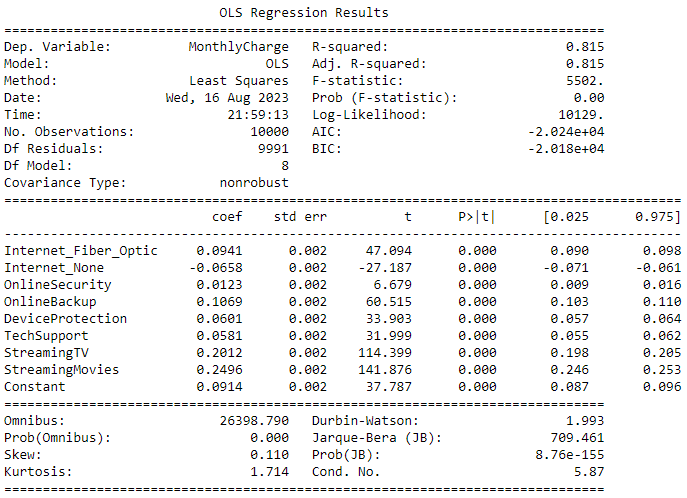

In [41]:
#Checking for multicollinearity VIF >10, Episode 1 coding was referenced (Sewell, 2023)
#the independent variables set
X = regress_churn[["Children","Age","Income","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0               Children  1.868961
1                    Age  3.439973
2                 Income  2.707570
3             Port_modem  1.864633
4   Internet_Fiber_Optic  2.113554
5          Internet_None  1.543683
6                  Phone  6.331225
7         OnlineSecurity  1.524703
8           OnlineBackup  1.758019
9       DeviceProtection  1.727658
10           TechSupport  1.561173
11           StreamingTV  1.881636
12       StreamingMovies  1.884330


In [42]:
#Backward elimination #1 p-value > 0.05 elimated Age with a p-value of 0.937

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Income","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     3669.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:03:38   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9987   BIC:                        -2.014e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0074 

In [43]:
#Backward elimination #2 p-value > 0.05 elimated Income with a p-value of 0.596

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4002.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:03:54   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9988   BIC:                        -2.015e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0073 

In [44]:
#Backward elimination #3 p-value > 0.05 elimated Phone with a p-value of 0.609

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Port_modem","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4403.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:03:55   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9989   BIC:                        -2.016e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0073 

In [45]:
#Backward elimination #4 p-value > 0.05 elimated Port_modem with a p-value of 0.394

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4892.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:03:56   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9990   BIC:                        -2.017e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0074 

In [46]:
#Backward elimination #5 p-value > 0.05 elimated Children with a p-value of 0.072
#Final reduced model

y = regress_churn.MonthlyCharge
X = regress_churn[["Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     5502.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:03:57   Log-Likelihood:                 10129.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9991   BIC:                        -2.018e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Internet_Fiber_Optic     0.0941 

## E1: Model Comparison

Now that the initial and reduced multiple linear regression models have been produced a comparison can be done with the regressions summaries. Dr. Middleton's part 2 webinar gave a detailed breakdown of model evaluation, the two model evaluation metrics that will be covered are R-squared and F-statistics. R-square signals, "percentage variation in dependent that is explained by independent variables” (Middleton, 2023). The initial MLR with 13 independent variables had an R-squared of 0.815 or 81.5% variation in Y explained by the independent variables. The reduced MLR with 8 independent variables had an R-squared of 0.815 or 81.5% variation in Y explained by the independent variables. Comparing the R-squared values there's no change between the two models but the reduced model was able to achieve the same variance with fewer independent variables. F statistics is broken down in Dr. Middleton's part 2 webinar, "a value you get when you run an ANOVA test or a regression analysis to find out if a group of variables are jointly significant or different" (Middleton, 2023). The initial MLR model had an F-statistic of 3386. The reduced MLR model had a F-statistic of 5502. Comparing the two models, the reduced MLR model had higher joint significance with fewer independent variables. 

## E2: Output And Calculations

- Residual plot of the reduced model

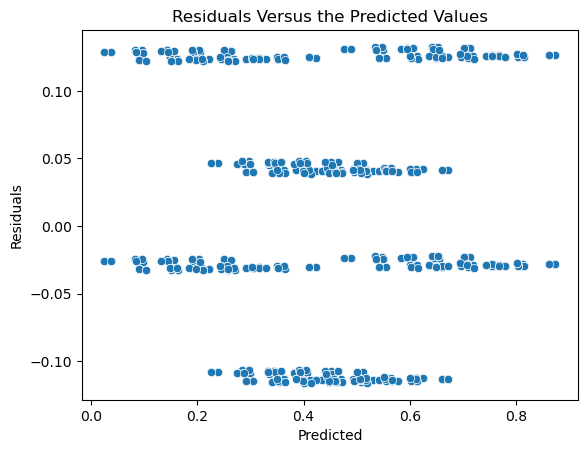

In [47]:
#Creating variables for residuals and fitted values to graph
#Statsmodels documentation was referenced for guidance (Statsmodels.regression.linear_model.olsresults, 2023)   
residuals = results.resid
fittedvalues = results.fittedvalues

plt.title("Residuals Versus the Predicted Values")
sns.scatterplot(x= fittedvalues, y = residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals");

- Residuals qqplot

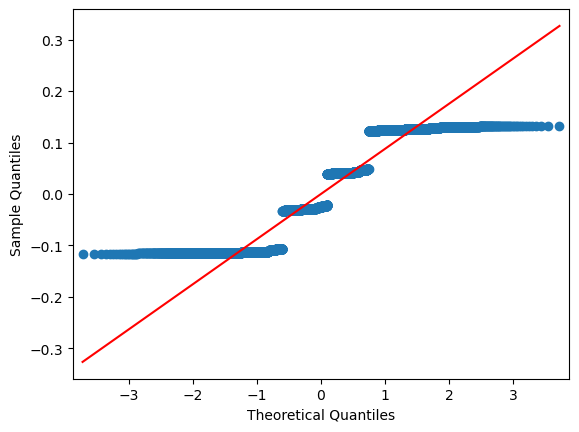

In [48]:
#Plotting residuals qqplot
#Statsmodels documentation was referenced for guidance (Statsmodels.graphics.gofplots.qqplot, 2023)
fig = sm.qqplot(residuals, line="s")
plt.show()

- Reduced model’s residual standard error is 0.08791321968728204

In [49]:
#Reduced model’s residual standard error
results.resid.std(ddof=X.shape[1])

0.08791321968728204

## E3: Code

In [50]:
# Initial model for Multiple Linear Regression

# Set dependent variable
y = regress_churn.MonthlyCharge
# Set multiple independent variables
X = regress_churn[["Children","Age","Income","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     3386.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.023e+04
Df Residuals:                    9986   BIC:                        -2.013e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0074 

In [51]:
#the independent variables set
X = regress_churn[["Children","Age","Income","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0               Children  1.868961
1                    Age  3.439973
2                 Income  2.707570
3             Port_modem  1.864633
4   Internet_Fiber_Optic  2.113554
5          Internet_None  1.543683
6                  Phone  6.331225
7         OnlineSecurity  1.524703
8           OnlineBackup  1.758019
9       DeviceProtection  1.727658
10           TechSupport  1.561173
11           StreamingTV  1.881636
12       StreamingMovies  1.884330


In [52]:
#Backward elimination #1 p-value > 0.05 elimated Age with a p-value of 0.937

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Income","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     3669.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:30   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9987   BIC:                        -2.014e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0074 

In [53]:
#Backward elimination #2 p-value > 0.05 elimated Income with a p-value of 0.596

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Port_modem","Internet_Fiber_Optic","Internet_None","Phone","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4002.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:31   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9988   BIC:                        -2.015e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0073 

In [54]:
#Backward elimination #3 p-value > 0.05 elimated Phone with a p-value of 0.609

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Port_modem","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4403.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:32   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9989   BIC:                        -2.016e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0073 

In [55]:
#Backward elimination #4 p-value > 0.05 elimated Port_modem with a p-value of 0.394

y = regress_churn.MonthlyCharge
X = regress_churn[["Children","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4892.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:32   Log-Likelihood:                 10131.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9990   BIC:                        -2.017e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0074 

In [56]:
#Backward elimination #5 p-value > 0.05 elimated Children with a p-value of 0.072
#Final reduced model

y = regress_churn.MonthlyCharge
X = regress_churn[["Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].assign(Constant=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     5502.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:05:33   Log-Likelihood:                 10129.
No. Observations:               10000   AIC:                        -2.024e+04
Df Residuals:                    9991   BIC:                        -2.018e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Internet_Fiber_Optic     0.0941 

## F1: Results

Dr. Middleton's discussion and interpretation of the analysis in webinar part 2 helped formulate this section(Middleton, 2023).

#### Reduced linear regression model equation

$$
\hat{y} = 0.0914 + 0.0941(Internet\hspace{1mm}fiber\hspace{1mm}optic) - 0.0658(Internet\hspace{1mm}none) + 0.0123(OnlineSecurity) + 0.1069(OnlineBackup) + 0.0601(DeviceProtection) + 0.0581(TechSupport) + 0.2012(StreamingTV) + 0.2496(StreamingMovies)
$$

#### Interpretation of the coefficients of the reduced model

Unifying Data Science's interpretation of variables with more than 2 categories (dummy variables) helped in interpreting below (Using and interpreting indicator (dummy) variables 2023). Indicator variables were created for all values of the variable except Internet_DSL became the reference group for the regression.


•	Keeping all things constant, one unit increase in Internet_Fiber_Optic is associated with a 0.0941 unit increase in Monthly Charge.

    - The difference between Internet_Fiber_Optic and the reference group (Internet_DSL) is 0.0941.

•	Keeping all things constant, one unit increase in Internet_None  is associated with a 0.0658 unit decrease in Monthly Charge.
    
    - The difference between Internet_None and the reference group (Internet_DSL) is -0.0658.

•	Keeping all things constant, one unit increase in OnlineSecurity is associated with a 0.0123 unit increase in Monthly Charge.

•	Keeping all things constant, one unit increase in OnlineBackup is associated with a 0.1069 unit increase in Monthly Charge.

•	Keeping all things constant, one unit increase in DeviceProtection is associated with a 0.0601 unit increase in Monthly Charge.

•	Keeping all things constant, one unit increase in TechSupport is associated with a 0.0581 unit increase in Monthly Charge.

•	Keeping all things constant, one unit increase in StreamingTV is associated with a 0.2012 unit increase in Monthly Charge.

•	Keeping all things constant, one unit increase in StreamingMovies is associated with a 0.2496 unit increase in Monthly Charge.



•	The only difference left to interpret is the difference between Internet_Fiber_Optic and Internet_None:

     = (Internet_Fiber_Optic - Internet_DSL) - (Internet_None - Internet_DSL)

     = 0.0941 - -0.0658
 
     = 1.599

#### Statistical  and practical significance of the reduced model

The reduced model is statistically significance because the probability of the F-statistic is  0.00. Due to the probability being 0, this implies that the regression is significant. It is also less than the 0.05 cutoff which makes it improbable this significance would happen by chance. The F-statistic equaling 0.00 gives me the confidence stating the reduced model is statistically significance. 

The practical significance of the reduced model is not meaningful. While the reduced model is statistically significant and helps in answering the research question of "Which factors significantly impact customer monthly charges?" the practical utility of this analysis is lacking. The analysis did help produce factors that impacted customer monthly charges but without knowing other insights or being able to infer further with the current analysis it will lead to minimal practical business impact. Section F2 will discuss further steps to take with the insights gained from the reduced model.

#### Limitations

One of the limitations of the regression analysis was the feature selection method chosen. Of the three: filter, wrapper, and embedded methods the course work focused on wrapper methods which were chosen for the analysis. Backward stepwise elimination was implemented of the two wrapper methods as it best aligned with the research question. While the method did achieve a reduced model with higher significance, the same probability, and fewer variables was this the best method for model reduction? Having an understanding of the other methods and implications of applying those reduction methods would help in solidifying if backward stepwise elimination was the right choice. 

## F2: Recommendations

The analysis can now answer the research question, "Which factors significantly impact customer monthly charges?". While those 8 factors in the reduced model had a significant probability of predicting monthly charges the analysis was not very practical. This leads to the recommendation that further analysis is needed for the analysis to have practical significance for a business application or recommendation. Other insights gained from other variables or other types of analysis methods could have more meaningful applications. The dataset is a customer churn dataset and predicting the churn variable or logistic regression method seems like it would have the most insight. An understanding of the monthly charges can be utilized later to further understand customer insights. 

## G: Panopto Demonstration

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=e27940dc-503a-4404-a983-b068000fe3bb

## H: Sources Of Third-Party Code

Ebner, J. (2022, March 29). How to use pandas get dummies in python. Sharp Sight. https://www.sharpsightlabs.com/blog/pandas-get-dummies/ 

Moffitt, C. (2017, February 6). Guide to encoding categorical values in&nbsp;python. Practical Business Python Atom. https://pbpython.com/categorical-encoding.html 

Neal. (2022, March 31). Residual standard error of a regression in python. techhelpnotes. https://techhelpnotes.com/residual-standard-error-of-a-regression-in-python/ 

Sabu, H. (2022, February 3). Data pre-processing with Sklearn using standard and Minmax Scaler. GeeksforGeeks. https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/ 

Sewell, W. (2023a, July). D208 predictive modeling webinar - Episode 1. my.wgu.edu. Retrieved July 25, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Sewell%20D208_Predictive_Modeling_Webinar_Episode%201t.pptx?d=w285c378f808947589abe29976d079b56&amp;csf=1&amp;web=1&amp;e=EDZkfD. 

Sewell, W. (2023, July). D208 predictive modeling webinar - Episode 4. my.wgu.edu. Retrieved July 25, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Sewell%20D208_Predictive_Modeling_Webinar_Episode%204.pptx?d=w1c293b743198404e9032304807c8fade&amp;csf=1&amp;web=1&amp;e=MOsdbl. 

Statsmodels.graphics.gofplots.qqplot. statsmodels.graphics.gofplots.qqplot - statsmodels 0.14.0. (2023, May 5). https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html 

Statsmodels.regression.linear_model.olsresults. statsmodels.regression.linear_model.OLSResults - statsmodels 0.15.0 (+44). (2023, June 30). https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults 

Waskom, M. (n.d.). Seaborn.scatterplot#. seaborn.scatterplot - seaborn 0.12.2 documentation. https://seaborn.pydata.org/generated/seaborn.scatterplot.html 


## I: Sources

Middleton, K. (2023, July). “Getting Started&nbsp; with D208” Part I. https://westerngovernorsuniversity.com. Retrieved from https://westerngovernorsuniversity.sharepoint.com/:b:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Middleton%20Getting%20Started%20with%20D208(Part%20I)COIT.pdf?csf=1&amp;web=1&amp;e=YEjlJ0. 

Middleton, K. (2023, July). “Getting Started&nbsp; with D208” Part II. https://westerngovernorsuniversity.com. Retrieved from https://westerngovernorsuniversity.sharepoint.com/:b:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Middleton%20Getting%20Started%20with%20D208%20(Part%20II)COIT.pdf?csf=1&web=1&e=MVdCCj. 

Multiple regression analysis using SPSS statistics. How to perform a Multiple Regression Analysis in SPSS Statistics | Laerd Statistics. (n.d.). https://statistics.laerd.com/spss-tutorials/multiple-regression-using-spss-statistics.php 

R or python. Western Governors University. (2022, November 16). https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html 

Rivera, Alex. (2023). Task 1: Data Cleaning. Unpublished manuscript, Western Governors University.

Using and interpreting indicator (dummy) variables¶. Using and Interpreting Indicator (Dummy) Variables - Unifying Data Science. (n.d.). https://www.unifyingdatascience.org/html/interpreting_indicator_vars.html 